In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [14]:
df = pd.read_csv("clientes_simulados.csv")
df.head()

,ID,Idade,Renda_Mensal,Score_Gastos
0,1,56,4699,96
1,2,46,12913,24
2,3,32,7935,23
3,4,60,2142,62
4,5,25,4246,96


           ID   Idade  Renda_Mensal  Score_Gastos
count  200.00  200.00        200.00        200.00
mean   100.50   41.78       8478.65         48.38
std     57.88   13.84       3402.03         28.92
min      1.00   18.00       1017.00          1.00
25%     50.75   30.00       5876.25         22.50
50%    100.50   42.00       8301.50         47.00
75%    150.25   54.00      11059.75         73.25
max    200.00   65.00      17570.00        100.00


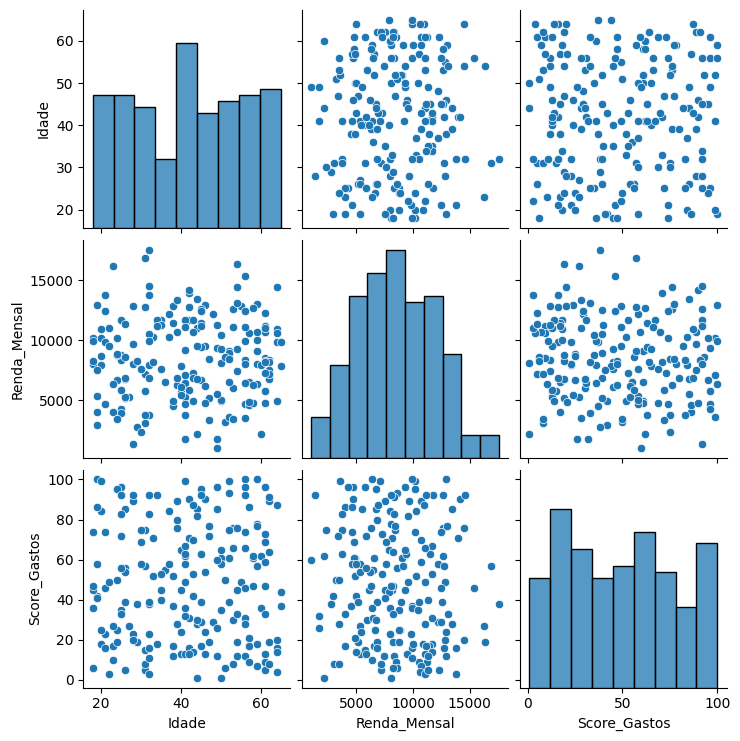

In [16]:
print(df.describe().round(2))

sns.pairplot(df[['Idade', 'Renda_Mensal', 'Score_Gastos']])
plt.show()

In [17]:
# Seleciona as colunas numéricas que serão usadas na clusterização
X = df[['Idade', 'Renda_Mensal', 'Score_Gastos']]
# Instancia o objeto StandardScaler, que será usado para normalizar os dados
scaler = StandardScaler()
# Aplica a transformação nos dados selecionados, retornando os valores normalizados
X_scaled = scaler.fit_transform(X)

C:\Users\Iago Alecrim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Iago Alecrim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Iago Alecrim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Iago Alecrim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

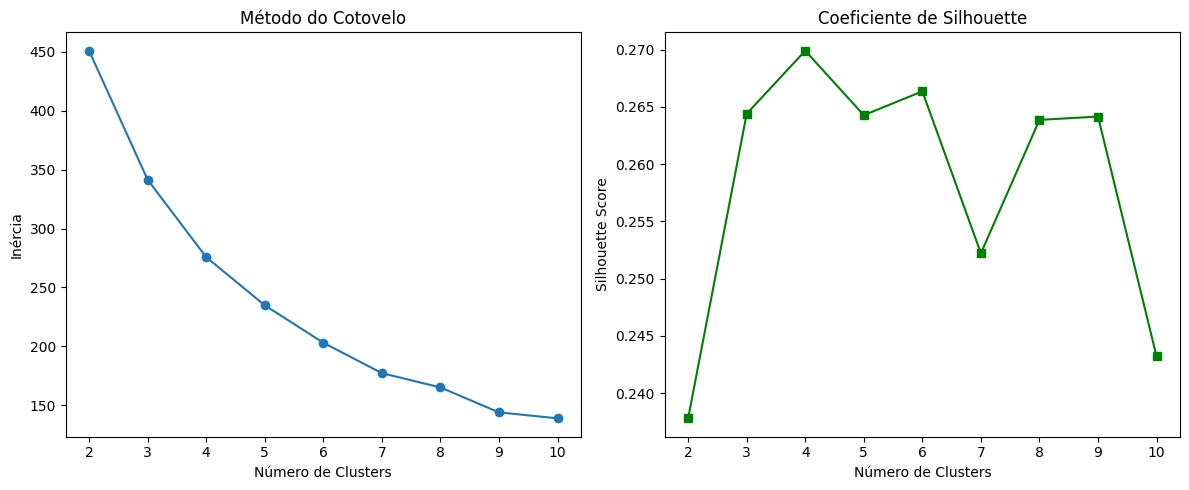

In [18]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    # Instancia o modelo KMeans com k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Treina o modelo com os dados normalizados
    kmeans.fit(X_scaled)
    # Armazena a inércia (soma das distâncias dos pontos aos centróides do cluster)
    inertia.append(kmeans.inertia_)
    # Armazena o coeficiente de silhouette, que avalia a separação entre os clusters
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


plt.figure(figsize=(12, 5))

# Primeiro gráfico: método do cotovelo
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")

# Segundo gráfico: coeficiente de silhouette
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Coeficiente de Silhouette")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")

# Ajusta o layout para que os dois gráficos não se sobreponham
plt.tight_layout()

# Salva a imagem com os dois gráficos como um arquivo PNG
plt.savefig("graficos_metodos_kmeans.png")
plt.show()

In [21]:
# Cria um modelo KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
# Aplica o KMeans aos dados normalizados e cria uma nova coluna 'Cluster' com os rótulos atribuídos
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

C:\Users\Iago Alecrim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,ID,Idade,Renda_Mensal,Score_Gastos,Cluster
0,1,56,4699,96,2
1,2,46,12913,24,0
2,3,32,7935,23,1
3,4,60,2142,62,3
4,5,25,4246,96,1


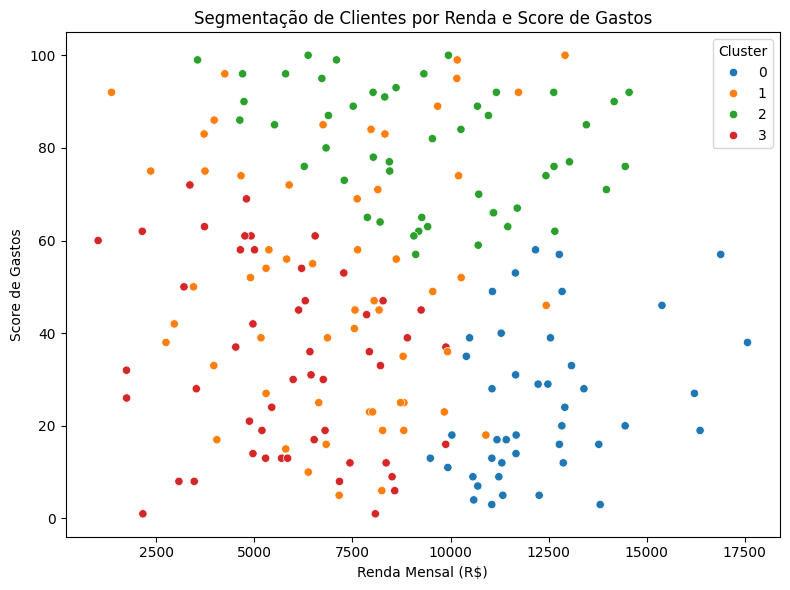

In [24]:
# Cria uma figura com tamanho 8x6 polegadas
plt.figure(figsize=(8, 6))
# Cria o gráfico de dispersão com os dados
# Eixo X: Renda Mensal
# Eixo Y: Score de Gastos
# hue='Cluster' define as cores dos pontos com base no cluster atribuído
# palette='tab10' define uma paleta de cores para distinguir os grupos
sns.scatterplot(data=df, x='Renda_Mensal', y='Score_Gastos', hue='Cluster', palette='tab10')
plt.title('Segmentação de Clientes por Renda e Score de Gastos')
plt.xlabel('Renda Mensal (R$)')
plt.ylabel('Score de Gastos')
plt.legend(title='Cluster')
# Ajusta o layout para que nada fique cortado
plt.tight_layout()
#salva imagem do gráfico
plt.savefig("visualizacao_clusters.png") 
plt.show()

In [26]:
df.groupby('Cluster').mean().round(2)

,ID,Idade,Renda_Mensal,Score_Gastos
Cluster,,,,
0,105.44,43.19,12336.95,24.88
1,89.09,25.33,7138.86,51.16
2,109.90,49.88,9371.08,80.20
3,99.86,51.24,5795.44,33.62


In [ ]:
##  Considerações Finais

Com base na análise dos clusters, identificamos **4 perfis distintos de clientes**:

- **Cluster 0 (azul):** Alta renda, mas baixo score de gastos. Representa clientes conservadores. Podem ser alvo de campanhas de engajamento.
- **Cluster 1 (laranja):** Perfil variado, com alta dispersão de renda e consumo. São clientes voláteis, exigem segmentação comportamental.
- **Cluster 2 (verde):** Renda média e alto score. Representam clientes de alto valor para estratégias de fidelização.
- **Cluster 3 (vermelho):** Baixa renda e consumo. Potencial para campanhas de upsell ou onboarding educativo.

>  *O modelo demonstrou capacidade de identificar padrões relevantes para apoiar decisões estratégicas em marketing e relacionamento com o cliente.*